# QuatIca Core Functionality Demo

This notebook demonstrates all the core functionality examples from the README.
Run each cell to see the code in action!

## Setup and Imports

In [1122]:
import sys
import os
import numpy as np
import quaternion
import matplotlib.pyplot as plt

In [1123]:
# Add the core module to the path
sys.path.append('core')

In [1124]:
print("✅ All imports successful!")

✅ All imports successful!


## 1. Basic Matrix Operations

In [1125]:
from core.utils import quat_matmat, quat_frobenius_norm
from core.data_gen import create_test_matrix

In [1126]:
# Create test matrices
A = create_test_matrix(3, 4)
B = create_test_matrix(4, 2)

In [1127]:
print("Matrix A shape:", A.shape)
print("Matrix B shape:", B.shape)
print("Matrix A norm:", quat_frobenius_norm(A))
print("Matrix B norm:", quat_frobenius_norm(B))

Matrix A shape: (3, 4)
Matrix B shape: (4, 2)
Matrix A norm: 21.057134556038882
Matrix B norm: 13.07378851724615


In [1128]:
# Matrix multiplication
C = quat_matmat(A, B)
print("Matrix C = A @ B shape:", C.shape)
print("Matrix C norm:", quat_frobenius_norm(C))

Matrix C = A @ B shape: (3, 2)
Matrix C norm: 156.37816277332283


In [1129]:
print("✅ Basic matrix operations work!")

✅ Basic matrix operations work!


## 2. QR Decomposition

In [1130]:
from core.decomp.qsvd import qr_qua

In [1131]:
# Create a test matrix
X_quat = create_test_matrix(4, 3)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (4, 3)


In [1132]:
# QR decomposition
Q, R = qr_qua(X_quat)
print("Q shape:", Q.shape)
print("R shape:", R.shape)

Q shape: (4, 3)
R shape: (3, 3)


In [1133]:
# Verify reconstruction
X_recon = quat_matmat(Q, R)
reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
print("Reconstruction error:", reconstruction_error)

Reconstruction error: 4.384766065462204e-15


In [1134]:
print("✅ QR decomposition works!")

✅ QR decomposition works!


## 3. Quaternion SVD (Q-SVD)

In [1135]:
from core.decomp.qsvd import classical_qsvd, classical_qsvd_full

In [1136]:
# Create a test matrix
X_quat = create_test_matrix(5, 4)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (5, 4)


In [1137]:
# Truncated Q-SVD
R = 2  # Target rank
U, s, V = classical_qsvd(X_quat, R)
print("Truncated Q-SVD:")
print("  U shape:", U.shape)
print("  s length:", len(s))
print("  V shape:", V.shape)

Truncated Q-SVD:
  U shape: (5, 2)
  s length: 2
  V shape: (4, 2)


In [1138]:
# Full Q-SVD
U_full, s_full, V_full = classical_qsvd_full(X_quat)
print("\nFull Q-SVD:")
print("  U_full shape:", U_full.shape)
print("  s_full length:", len(s_full))
print("  V_full shape:", V_full.shape)


Full Q-SVD:
  U_full shape: (5, 5)
  s_full length: 4
  V_full shape: (4, 4)


In [1139]:
print("✅ Q-SVD works!")

✅ Q-SVD works!


## 4. Randomized Q-SVD

In [1140]:
from core.decomp.qsvd import rand_qsvd
from core.utils import quat_hermitian

In [1141]:
# Create a test matrix
X_quat = create_test_matrix(8, 6)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (8, 6)


In [1142]:
# Randomized Q-SVD with different parameters
R = 3  # Target rank
print(f"Target rank R = {R}")

Target rank R = 3


In [1143]:
# Test with different power iterations
for n_iter in [1, 2, 3]:
    print(f"\nTesting with {n_iter} power iteration(s):")
    
    U, s, V = rand_qsvd(X_quat, R, oversample=5, n_iter=n_iter)
    print(f"  U shape: {U.shape}")
    print(f"  V shape: {V.shape}")
    print(f"  s shape: {s.shape}")
    print(f"  Singular values: {s}")
    
    # Test reconstruction
    S_diag = np.diag(s)
    X_recon = quat_matmat(quat_matmat(U, S_diag), quat_hermitian(V))
    reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
    relative_error = reconstruction_error / quat_frobenius_norm(X_quat)
    print(f"  Reconstruction error: {reconstruction_error:.6f}")
    print(f"  Relative error: {relative_error:.6f}")


Testing with 1 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [43.14755466 34.09365749 23.41481818]
  Reconstruction error: 17.954505
  Relative error: 0.287697

Testing with 2 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [43.14755466 34.09365749 23.41481818]
  Reconstruction error: 17.954505
  Relative error: 0.287697

Testing with 3 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [43.14755466 34.09365749 23.41481818]
  Reconstruction error: 17.954505
  Relative error: 0.287697


In [1144]:
# Test with full rank for perfect reconstruction
print(f"\nTesting with full rank (R = {min(X_quat.shape)}):")
U_full, s_full, V_full = rand_qsvd(X_quat, min(X_quat.shape), oversample=5, n_iter=2)
S_full_diag = np.diag(s_full)
X_recon_full = quat_matmat(quat_matmat(U_full, S_full_diag), quat_hermitian(V_full))
reconstruction_error_full = quat_frobenius_norm(X_quat - X_recon_full)
print(f"  Full rank reconstruction error: {reconstruction_error_full:.2e}")


Testing with full rank (R = 6):
  Full rank reconstruction error: 8.73e-14


In [1145]:
print("✅ Randomized Q-SVD works!")

✅ Randomized Q-SVD works!


## 5. Eigenvalue Decomposition

In [1146]:
from core.decomp import quaternion_eigendecomposition, quaternion_eigenvalues, quaternion_eigenvectors
from core.utils import quat_hermitian

In [1147]:
# Create a Hermitian matrix A = B^H @ B
B = create_test_matrix(4, 3)
B_H = quat_hermitian(B)
A_quat = quat_matmat(B_H, B)
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [1148]:
# Full eigendecomposition
eigenvalues, eigenvectors = quaternion_eigendecomposition(A_quat)
print("Full eigendecomposition:")
print("  Number of eigenvalues:", len(eigenvalues))
print("  Eigenvectors shape:", eigenvectors.shape)

Full eigendecomposition:
  Number of eigenvalues: 3
  Eigenvectors shape: (3, 3)


In [1149]:
# Extract only eigenvalues
eigenvals = quaternion_eigenvalues(A_quat)
print("\nEigenvalues only:", len(eigenvals))


Eigenvalues only: 3


In [1150]:
# Extract only eigenvectors
eigenvecs = quaternion_eigenvectors(A_quat)
print("Eigenvectors only shape:", eigenvecs.shape)

Eigenvectors only shape: (3, 3)


In [1151]:
# Verify eigenvalues are real
imaginary_parts = np.imag(eigenvalues)
max_imag = np.max(np.abs(imaginary_parts))
print("Maximum imaginary part:", max_imag)

Maximum imaginary part: 7.836964631435928e-34


In [1152]:
print("✅ Eigenvalue decomposition works!")

✅ Eigenvalue decomposition works!


## 6. LU Decomposition

In [1153]:
from core.decomp import quaternion_lu, verify_lu_decomposition

# Create a test matrix (set to 300x600 to validate rectangular LU)
A = create_test_matrix(300, 600)
print("Matrix A shape:", A.shape)

Matrix A shape: (300, 600)


In [1154]:
# LU decomposition
L, U = quaternion_lu(A)
print("LU decomposition:")
print("  L shape:", L.shape)
print("  U shape:", U.shape)

LU decomposition:
  L shape: (300, 300)
  U shape: (300, 600)


In [1155]:
# Verify reconstruction (A = L @ U)
LU = quat_matmat(L, U)
reconstruction_error = quat_frobenius_norm(A - LU)
relative_error = reconstruction_error / quat_frobenius_norm(A)
print("  Reconstruction error:", reconstruction_error)
print("  Relative error:", relative_error)

  Reconstruction error: 41462.24971517807
  Relative error: 1.4132881638165093


In [1156]:
# Test with permutation matrix
L_p, U_p, P = quaternion_lu(A, return_p=True)
print("\nWith permutation matrix:")
print("  P shape:", P.shape)
PA = quat_matmat(P, A)
LU_p = quat_matmat(L_p, U_p)
permutation_error = quat_frobenius_norm(PA - LU_p)
print("  P*A = L*U error:", permutation_error)


With permutation matrix:
  P shape: (300, 300)
  P*A = L*U error: 2.9468562326607495e-10


In [1157]:
# Test the alternative form: A = (P^T * L) * U
P_T = quat_hermitian(P)  # P^T
P_T_L = quat_matmat(P_T, L_p)  # P^T * L
A_recon_alt = quat_matmat(P_T_L, U_p)  # (P^T * L) * U
alt_error = quat_frobenius_norm(A - A_recon_alt)
print("  A = (P^T * L) * U error:", alt_error)

  A = (P^T * L) * U error: 2.9468562326607495e-10


In [1158]:
# Structural checks on pivoted factors (valid for rectangular matrices):
N = min(A.shape[0], A.shape[1])

# L_p should be lower-triangular (lower-trapezoidal) with unit diagonal on the leading N×N block
L_p_real = quaternion.as_float_array(L_p)[:, :, 0]
is_Lp_lower = np.allclose(L_p_real, np.tril(L_p_real), atol=1e-12)
unit_diag = np.allclose(np.diag(L_p_real[:N, :N]), np.ones(N), atol=1e-12)
print("  L (pivoted) is lower-triangular:", is_Lp_lower)
print("  L (pivoted) has unit diagonal (first N):", unit_diag)

# U_p (N×n) should be upper-triangular (upper-trapezoidal)
U_p_real = quaternion.as_float_array(U_p)[:, :, 0]
is_Up_upper = np.allclose(U_p_real, np.triu(U_p_real), atol=1e-12)
print("  U (pivoted) is upper-triangular:", is_Up_upper)

# Check if P^T * L is lower triangular (only when no pivoting needed)
P_T_L_float = quaternion.as_float_array(P_T_L)
P_T_L_real = P_T_L_float[:, :, 0]
is_P_T_L_lower_triangular = np.allclose(P_T_L_real, np.tril(P_T_L_real), atol=1e-12)
print("  P^T * L is lower triangular:", is_P_T_L_lower_triangular, "(only when no pivoting needed)")

print("✅ LU decomposition works!")

  L (pivoted) is lower-triangular: True
  L (pivoted) has unit diagonal (first N): True
  U (pivoted) is upper-triangular: True
  P^T * L is lower triangular: False (only when no pivoting needed)
✅ LU decomposition works!


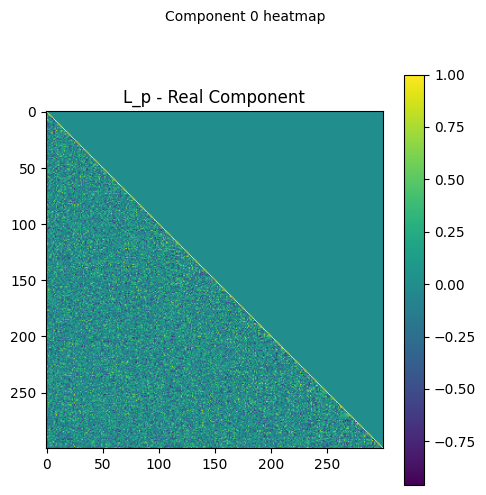

In [1159]:
from core.visualization import Visualizer
Visualizer.visualize_matrix(L_p, component=0, title="L_p - Real Component")


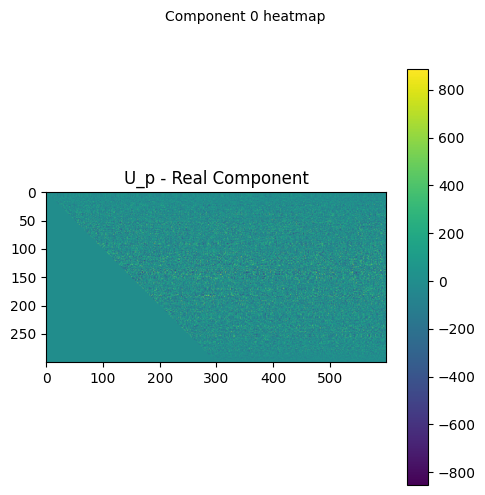

In [1160]:
Visualizer.visualize_matrix(U_p, component=0, title="U_p - Real Component")


## 7. Tridiagonalization

In [1161]:
from core.decomp import tridiagonalize

In [1162]:
# Use the same Hermitian matrix from above
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [1163]:
# Tridiagonalize
P, B_tridiag = tridiagonalize(A_quat)
print("Tridiagonalization:")
print("  P shape:", P.shape)
print("  B shape:", B_tridiag.shape)

Tridiagonalization:
  P shape: (3, 3)
  B shape: (3, 3)


In [1164]:
# Verify transformation
P_H = quat_hermitian(P)
PAP_H = quat_matmat(quat_matmat(P, A_quat), P_H)
transformation_error = quat_frobenius_norm(PAP_H - B_tridiag)
print("  Transformation error:", transformation_error)

  Transformation error: 4.7285889667288745e-14


In [1165]:
print("✅ Tridiagonalization works!")

✅ Tridiagonalization works!


## 8. Pseudoinverse Computation

In [1166]:
from core.solver import NewtonSchulzPseudoinverse

In [1167]:
# Create a test matrix
A = create_test_matrix(3, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (3, 4)


In [1168]:
# Compute pseudoinverse
solver = NewtonSchulzPseudoinverse()
A_pinv, residuals, covariances = solver.compute(A)
print("Pseudoinverse A^† shape:", A_pinv.shape)

Pseudoinverse A^† shape: (4, 3)


In [1169]:
# Verify pseudoinverse properties
A_pinv_H = quat_hermitian(A_pinv)
print("A^† shape:", A_pinv.shape)
print("A^†^† shape:", A_pinv_H.shape)

A^† shape: (4, 3)
A^†^† shape: (3, 4)


In [1170]:
print("✅ Pseudoinverse computation works!")

✅ Pseudoinverse computation works!


## 9. Linear System Solving

In [1171]:
from core.solver import QGMRESSolver

In [1172]:
# Create a square system A * x = b
A = create_test_matrix(3, 3)
b = create_test_matrix(3, 1)
print("System A shape:", A.shape)
print("Right-hand side b shape:", b.shape)

System A shape: (3, 3)
Right-hand side b shape: (3, 1)


In [1173]:
# Solve using Q-GMRES
solver = QGMRESSolver()
x, info = solver.solve(A, b)
print("Solution x shape:", x.shape)
print("Convergence info:", info)

Solution x shape: (3, 1)
Convergence info: {'iterations': 3, 'residual': np.float64(4.592076099571908e-16), 'residual_history': [[1, np.float64(0.8489531799399065), np.float64(0.8489531799399065)], [2, np.float64(0.4626259901324371), np.float64(0.39274780544578014)], [3, np.float64(1.0880151691970585e-15), np.float64(4.592076099571908e-16)]], 'converged': np.True_, 'V0': array([[-0.20196798,  0.08259546, -0.1688029 ],
       [-0.23212226, -0.08655755,  0.02576693],
       [-0.1571532 , -0.02438098,  0.38609743]]), 'V1': array([[ 0.01797895, -0.11273048,  0.01164041],
       [ 0.20570735,  0.62625186,  0.21382655],
       [-0.13228534, -0.27331282, -0.24876573]]), 'V2': array([[-0.3185876 ,  0.37336606, -0.33743889],
       [ 0.29342258,  0.27512419, -0.03477779],
       [ 0.29178777, -0.21603893, -0.45163229]]), 'V3': array([[ 0.62267626, -0.27518683,  0.3041493 ],
       [ 0.29437359,  0.40512942, -0.20964049],
       [ 0.27088075, -0.06217638, -0.50845509]])}


In [1174]:
# Verify solution
Ax = quat_matmat(A, x)
residual = quat_frobenius_norm(Ax - b)
print("Residual ||A*x - b||:", residual)

Residual ||A*x - b||: 3.3458998163026526e-15


In [1175]:
print("✅ Linear system solving works!")

✅ Linear system solving works!


## 10. Visualization

In [1176]:
from core.visualization import Visualizer

In [1177]:
# Create a test matrix
A = create_test_matrix(4, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (4, 4)


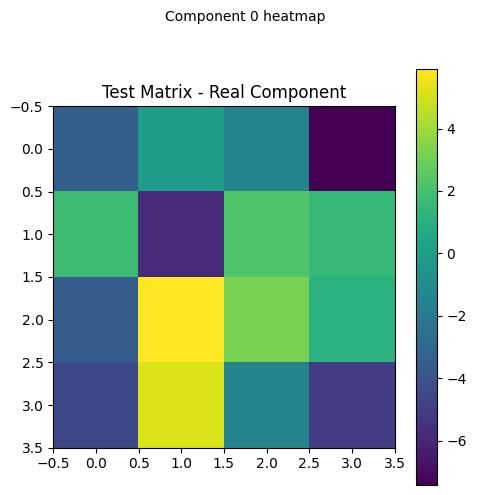

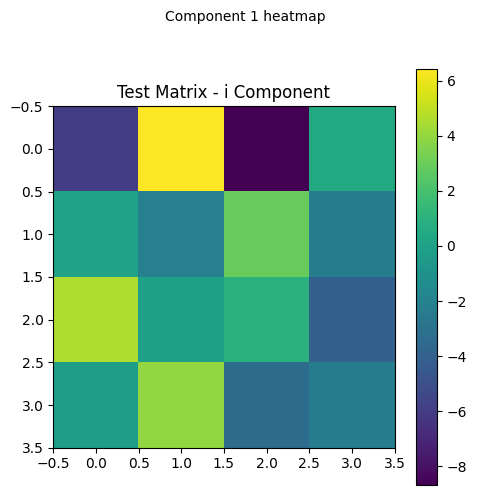

In [1178]:
# Plot matrix components
Visualizer.visualize_matrix(A, component=0, title="Test Matrix - Real Component")
Visualizer.visualize_matrix(A, component=1, title="Test Matrix - i Component")

In [1179]:
print("✅ Visualization works!")

✅ Visualization works!


## 11. Determinant and Rank Computation

In [1180]:
from core.utils import det, rank
from core.data_gen import generate_random_unitary_matrix

In [1181]:
print("\n" + "="*60)
print("DETERMINANT AND RANK COMPUTATION DEMONSTRATIONS")
print("="*60)


DETERMINANT AND RANK COMPUTATION DEMONSTRATIONS


### 10.1 Determinant Demo: Unitary Matrix with Known Determinant

In [1182]:
print("\n--- Determinant Demo: Unitary Matrix ---")


--- Determinant Demo: Unitary Matrix ---


In [1183]:
# Generate a random unitary matrix (determinant should be 1)
n = 4
U = generate_random_unitary_matrix(n)
print(f"Generated unitary matrix U of size {n}×{n}")

Generated unitary matrix U of size 4×4


In [1184]:
# Compute Dieudonné determinant
det_dieudonne = det(U, 'Dieudonne')
print(f"Dieudonné determinant: {det_dieudonne:.6f}")

Dieudonné determinant: 1.000000


In [1185]:
# Expected determinant for unitary matrix should be close to 1
expected_det = 1.0
error = abs(det_dieudonne - expected_det)
print(f"Expected determinant: {expected_det}")
print(f"Absolute error: {error:.2e}")

Expected determinant: 1.0
Absolute error: 6.66e-16


In [1186]:
if error < 1e-10:
    print("✅ Determinant computation works correctly!")
else:
    print("❌ Determinant computation has issues!")

✅ Determinant computation works correctly!


### 10.2 Rank Demo: Matrix Product with Known Rank

In [1187]:
print("\n--- Rank Demo: Matrix Product ---")


--- Rank Demo: Matrix Product ---


In [1188]:
# Create matrices A (m×r) and B (r×n) with known rank r
m, r, n = 5, 3, 4
A = create_test_matrix(m, r)
B = create_test_matrix(r, n)
print(f"Matrix A: {m}×{r}")
print(f"Matrix B: {r}×{n}")

Matrix A: 5×3
Matrix B: 3×4


In [1189]:
# Compute product C = A @ B
C = quat_matmat(A, B)
print(f"Matrix C = A @ B: {C.shape}")

Matrix C = A @ B: (5, 4)


In [1190]:
# Compute rank of C
computed_rank = rank(C)
expected_rank = r
print(f"Computed rank of C: {computed_rank}")
print(f"Expected rank: {expected_rank}")

Computed rank of C: 3
Expected rank: 3


In [1191]:
if computed_rank == expected_rank:
    print("✅ Rank computation works correctly!")
else:
    print("❌ Rank computation has issues!")

✅ Rank computation works correctly!


### 10.3 Additional Rank Examples

In [1192]:
print("\n--- Additional Rank Examples ---")


--- Additional Rank Examples ---


In [1193]:
# Test full-rank matrix
full_rank_matrix = create_test_matrix(4, 4)
full_rank = rank(full_rank_matrix)
print(f"Full-rank 4×4 matrix: rank = {full_rank} (expected: 4)")

Full-rank 4×4 matrix: rank = 4 (expected: 4)


In [1194]:
# Test zero matrix
zero_matrix = np.zeros((3, 3), dtype=np.quaternion)
zero_rank = rank(zero_matrix)
print(f"Zero 3×3 matrix: rank = {zero_rank} (expected: 0)")

Zero 3×3 matrix: rank = 0 (expected: 0)


In [1195]:
# Test identity matrix
identity_matrix = np.eye(5, dtype=np.quaternion)
identity_rank = rank(identity_matrix)
print(f"Identity 5×5 matrix: rank = {identity_rank} (expected: 5)")

Identity 5×5 matrix: rank = 5 (expected: 5)


In [1196]:
print("✅ All rank examples work correctly!")

✅ All rank examples work correctly!


## 12. Power Iteration for Dominant Eigenvector

In [1197]:
from core.utils import power_iteration
from core.decomp.eigen import quaternion_eigendecomposition

In [1198]:
print("\n" + "="*60)
print("POWER ITERATION FOR DOMINANT EIGENVECTOR")
print("="*60)


POWER ITERATION FOR DOMINANT EIGENVECTOR


### 11.1 Power Iteration Demo: Comparison with Eigendecomposition

In [1199]:
print("\n--- Power Iteration vs Eigendecomposition ---")


--- Power Iteration vs Eigendecomposition ---


In [1200]:
# Create Hermitian matrix: A = B^H @ B (positive definite)
B = create_test_matrix(5, 5)
A = quat_matmat(quat_hermitian(B), B)
print(f"Created Hermitian matrix A of size {A.shape}")

Created Hermitian matrix A of size (5, 5)


In [1201]:
# Run power iteration
print("\nRunning power iteration...")
power_eigenvector, power_eigenvalue = power_iteration(A, return_eigenvalue=True, verbose=True)


Running power iteration...
Iteration 0: norm_diff = 7.73e-01
Iteration 1: norm_diff = 3.86e-01
Iteration 2: norm_diff = 2.50e-01
Iteration 3: norm_diff = 1.31e-01
Iteration 4: norm_diff = 6.29e-02
Iteration 5: norm_diff = 2.96e-02
Iteration 6: norm_diff = 1.39e-02
Iteration 7: norm_diff = 6.48e-03
Iteration 8: norm_diff = 3.03e-03
Iteration 9: norm_diff = 1.42e-03
Iteration 10: norm_diff = 6.63e-04
Iteration 11: norm_diff = 3.10e-04
Iteration 12: norm_diff = 1.45e-04
Iteration 13: norm_diff = 6.78e-05
Iteration 14: norm_diff = 3.17e-05
Iteration 15: norm_diff = 1.48e-05
Iteration 16: norm_diff = 6.93e-06
Iteration 17: norm_diff = 3.24e-06
Iteration 18: norm_diff = 1.52e-06
Iteration 19: norm_diff = 7.09e-07
Iteration 20: norm_diff = 3.31e-07
Iteration 21: norm_diff = 1.55e-07
Iteration 22: norm_diff = 7.25e-08
Iteration 23: norm_diff = 3.39e-08
Iteration 24: norm_diff = 1.58e-08
Iteration 25: norm_diff = 7.41e-09
Iteration 26: norm_diff = 3.46e-09
Iteration 27: norm_diff = 1.62e-09
It

In [1202]:
# Run eigendecomposition
print("\nRunning eigendecomposition...")
eigenvalues, eigenvectors = quaternion_eigendecomposition(A, verbose=False)


Running eigendecomposition...


In [1203]:
# Find dominant eigenvalue and eigenvector
dominant_idx = np.argmax(np.abs(eigenvalues))
dominant_eigenvalue = eigenvalues[dominant_idx]
dominant_eigenvector = eigenvectors[:, dominant_idx:dominant_idx+1]

In [1204]:
print(f"\nComparison Results:")
print(f"Power iteration eigenvalue: {power_eigenvalue:.6f}")
print(f"Eigendecomposition dominant eigenvalue: {dominant_eigenvalue:.6f}")
print(f"Eigenvalue difference: {abs(power_eigenvalue - abs(dominant_eigenvalue)):.2e}")


Comparison Results:
Power iteration eigenvalue: 1715.551169
Eigendecomposition dominant eigenvalue: 1715.551169+0.000000j
Eigenvalue difference: 2.96e-12


In [1205]:
# Compare eigenvectors
power_norm = quat_frobenius_norm(power_eigenvector)
decomp_norm = quat_frobenius_norm(dominant_eigenvector)

In [1206]:
power_normalized = power_eigenvector / power_norm
decomp_normalized = dominant_eigenvector / decomp_norm

In [1207]:
dot_product = quat_matmat(quat_hermitian(power_normalized), decomp_normalized)
dot_product_norm = quat_frobenius_norm(dot_product)

In [1208]:
print(f"Eigenvector alignment: {dot_product_norm:.6f}")

Eigenvector alignment: 1.000000


In [1209]:
# Verify results
eigenvalue_error = abs(power_eigenvalue - abs(dominant_eigenvalue))
eigenvector_error = abs(dot_product_norm - 1.0)

In [1210]:
if eigenvalue_error < 1e-6 and eigenvector_error < 1e-6:
    print("✅ Power iteration matches eigendecomposition perfectly!")
else:
    print("❌ Power iteration has issues!")

✅ Power iteration matches eigendecomposition perfectly!


### 11.2 Power Iteration Performance Across Sizes

In [1211]:
print("\n--- Performance Across Matrix Sizes ---")


--- Performance Across Matrix Sizes ---


In [1212]:
sizes = [3, 6, 9]
for size in sizes:
    print(f"\nTesting {size}×{size} matrix:")
    
    # Create test matrix
    B = create_test_matrix(size, size)
    A = quat_matmat(quat_hermitian(B), B)
    
    # Time power iteration
    import time
    start_time = time.time()
    eigenvector, eigenvalue = power_iteration(A, return_eigenvalue=True, verbose=False)
    power_time = time.time() - start_time
    
    # Time eigendecomposition
    start_time = time.time()
    eigenvalues, eigenvectors = quaternion_eigendecomposition(A, verbose=False)
    decomp_time = time.time() - start_time
    
    print(f"  Power iteration: {power_time:.3f}s")
    print(f"  Eigendecomposition: {decomp_time:.3f}s")
    print(f"  Speedup: {decomp_time/power_time:.1f}x faster")


Testing 3×3 matrix:
  Power iteration: 0.003s
  Eigendecomposition: 0.002s
  Speedup: 0.5x faster

Testing 6×6 matrix:
  Power iteration: 0.004s
  Eigendecomposition: 0.001s
  Speedup: 0.3x faster

Testing 9×9 matrix:
  Power iteration: 0.004s
  Eigendecomposition: 0.006s
  Speedup: 1.6x faster


In [1213]:
print("✅ Power iteration performance analysis complete!")

✅ Power iteration performance analysis complete!



HESSENBERG FORM (UPPER HESSENBERG REDUCTION)
Random matrix X shape: (200, 200)


Hessenberg reduction:
  P shape: (200, 200)
  H shape: (200, 200)
  P is unitary (P^H P = I): True
  Similarity error ||P X P^H - H||_F: 8.38e-11
  is_hessenberg(H): True


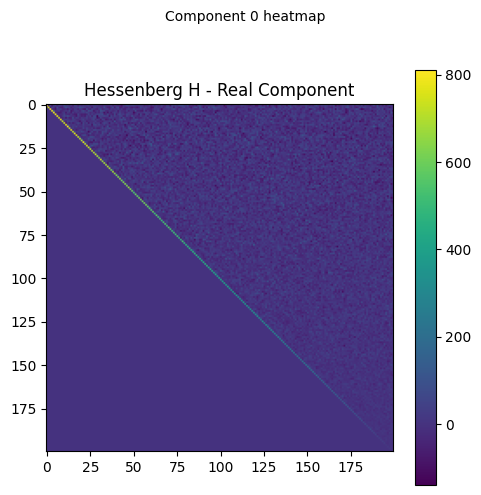

In [1214]:
# 13. Hessenberg Form (Upper Hessenberg Reduction)
from core.decomp.hessenberg import hessenbergize, is_hessenberg
from core.utils import quat_hermitian, quat_matmat, quat_frobenius_norm, quat_eye
from core.data_gen import create_test_matrix
from core.visualization import Visualizer
import numpy as np

print("\n" + "="*60)
print("HESSENBERG FORM (UPPER HESSENBERG REDUCTION)")
print("="*60)

# Create a random quaternion matrix
X = create_test_matrix(200, 200)
print("Random matrix X shape:", X.shape)

# Compute Hessenberg form
P_hess, H = hessenbergize(X)
print("Hessenberg reduction:")
print("  P shape:", P_hess.shape)
print("  H shape:", H.shape)

# Verify unitarity of P: P^H P = I
P_hess_H = quat_hermitian(P_hess)
I_check = quat_matmat(P_hess_H, P_hess)
print("  P is unitary (P^H P = I):", np.allclose(I_check, quat_eye(P_hess.shape[0]), atol=1e-10))

# Verify similarity relation: H = P * X * P^H
PX = quat_matmat(P_hess, X)
PXPH = quat_matmat(PX, P_hess_H)
print(f"  Similarity error ||P X P^H - H||_F: {quat_frobenius_norm(PXPH - H):.2e}")

# Check Hessenberg structure
print("  is_hessenberg(H):", is_hessenberg(H))

# Visualize the real component to illustrate Hessenberg pattern
Visualizer.visualize_matrix(H, component=0, title="Hessenberg H - Real Component")


## Summary

In [1215]:
print("🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!")
print("\n✅ Basic matrix operations")
print("✅ QR decomposition")
print("✅ Quaternion SVD (Q-SVD)")
print("✅ Randomized Q-SVD")
print("✅ Eigenvalue decomposition")
print("✅ Tridiagonalization")
print("✅ Pseudoinverse computation")
print("✅ Linear system solving")
print("✅ Visualization")
print("✅ Determinant computation")
print("✅ Rank computation")
print("✅ Power iteration")
print("✅ Hessenberg form")
print("\nThe code examples in the README are working correctly! 🚀") 

🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!

✅ Basic matrix operations
✅ QR decomposition
✅ Quaternion SVD (Q-SVD)
✅ Randomized Q-SVD
✅ Eigenvalue decomposition
✅ Tridiagonalization
✅ Pseudoinverse computation
✅ Linear system solving
✅ Visualization
✅ Determinant computation
✅ Rank computation
✅ Power iteration
✅ Hessenberg form

The code examples in the README are working correctly! 🚀


Experimental  - Schur Decomposition

n= 10 | none          | ran= 313/1000 | time=  0.19s | final_sub=1.747e-41 | sim=1.244e-08 | unit=1.135e-13
n= 10 | rayleigh      | ran= 273/1000 | time=  0.15s | final_sub=9.286e-38 | sim=1.220e-08 | unit=4.327e-14
n= 10 | implicit      | ran= 273/1000 | time=  0.12s | final_sub=0.000e+00 | sim=1.220e-08 | unit=3.925e-14
n= 10 | implicit+AED  | ran= 253/1000 | time=  0.20s | final_sub=0.000e+00 | sim=6.008e-08 | unit=4.017e-14
n= 10 | implicit+DS   | ran= 337/1000 | time=  0.54s | final_sub=0.000e+00 | sim=2.836e-08 | unit=9.396e-14


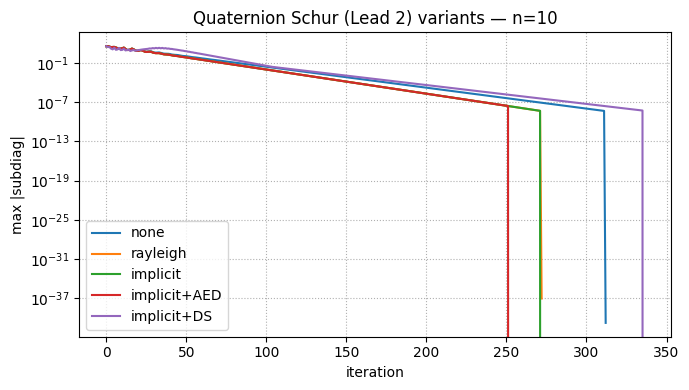

saved plot: validation_output/schur_lead2_variants_n10.png
n= 20 | none          | ran= 714/1000 | time=  1.72s | final_sub=8.941e-46 | sim=4.295e-08 | unit=6.992e-13
n= 20 | rayleigh      | ran=1000/1000 | time=  2.41s | final_sub=4.615e+01 | sim=3.714e-08 | unit=1.330e-12
n= 20 | implicit      | ran=1000/1000 | time=  1.63s | final_sub=1.333e-06 | sim=3.433e-08 | unit=2.032e-13
n= 20 | implicit+AED  | ran= 837/1000 | time=  2.21s | final_sub=0.000e+00 | sim=2.103e-07 | unit=1.953e-13
n= 20 | implicit+DS   | ran= 291/1000 | time=  1.53s | final_sub=0.000e+00 | sim=4.043e-08 | unit=1.247e-13


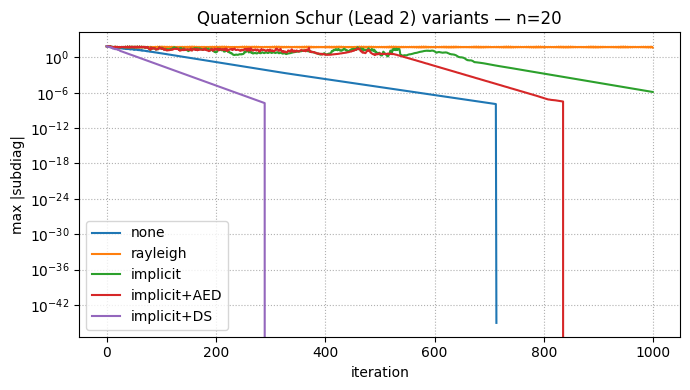

saved plot: validation_output/schur_lead2_variants_n20.png
n= 30 | none          | ran=1000/1000 | time=  4.84s | final_sub=4.210e+01 | sim=4.864e-08 | unit=2.738e-12
n= 30 | rayleigh      | ran=1000/1000 | time=  4.85s | final_sub=5.654e+00 | sim=5.691e-08 | unit=2.827e-12
n= 30 | implicit      | ran=1000/1000 | time=  4.53s | final_sub=1.792e+01 | sim=6.676e-08 | unit=2.772e-13
n= 30 | implicit+AED  | ran=1000/1000 | time=  5.19s | final_sub=2.345e+01 | sim=2.981e-07 | unit=2.894e-13
n= 30 | implicit+DS   | ran=1000/1000 | time= 10.23s | final_sub=1.592e+01 | sim=1.211e-08 | unit=6.075e-13


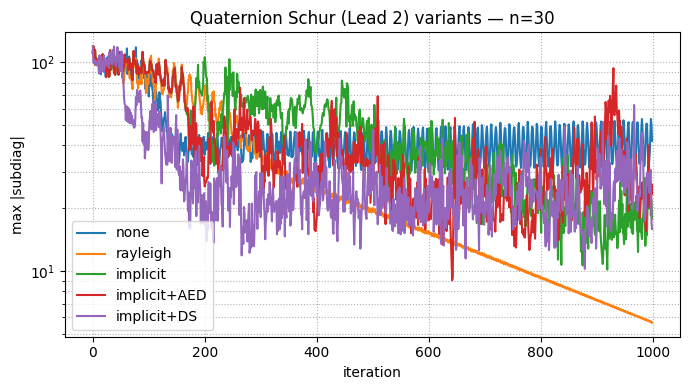

saved plot: validation_output/schur_lead2_variants_n30.png
n= 50 | none          | ran=1000/1000 | time= 16.49s | final_sub=8.472e+01 | sim=1.005e-07 | unit=5.510e-12
n= 50 | rayleigh      | ran=1000/1000 | time= 16.78s | final_sub=9.254e+01 | sim=1.120e-07 | unit=5.219e-12
n= 50 | implicit      | ran=1000/1000 | time= 14.97s | final_sub=3.353e+01 | sim=9.789e-09 | unit=3.685e-13
n= 50 | implicit+AED  | ran=1000/1000 | time= 17.53s | final_sub=2.386e+01 | sim=5.558e-08 | unit=4.366e-13
n= 50 | implicit+DS   | ran=1000/1000 | time= 31.90s | final_sub=2.084e+01 | sim=1.791e-07 | unit=7.003e-13


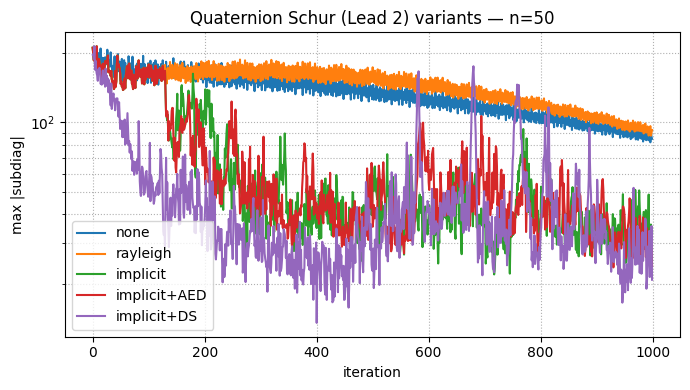

saved plot: validation_output/schur_lead2_variants_n50.png


In [1219]:
# Visual comparison: Lead 2 (pure QR) with/without Rayleigh shift and implicit variants
import sys, os, importlib, time, math
import numpy as np, quaternion
import matplotlib.pyplot as plt

# Robust path setup
root = os.getcwd()
if root not in sys.path:
    sys.path.insert(0, root)
core_path = os.path.join(root, "core")
if core_path not in sys.path:
    sys.path.insert(0, core_path)

# Reload schur module to avoid cache
import core.decomp.schur as _schur
importlib.reload(_schur)
quaternion_schur_pure = _schur.quaternion_schur_pure
quaternion_schur_pure_implicit = _schur.quaternion_schur_pure_implicit

from core.decomp.hessenberg import hessenbergize, check_hessenberg
from core.decomp.tridiagonalize import householder_matrix
from core.data_gen import create_test_matrix
from core.utils import quat_matmat, quat_hermitian, quat_frobenius_norm, quat_eye
from pathlib import Path

out_dir = Path("validation_output")
out_dir.mkdir(exist_ok=True)


def max_subdiag(H: np.ndarray) -> float:
    n = H.shape[0]
    maximum = 0.0
    for i in range(1, n):
        h = H[i, i - 1]
        s = math.sqrt(h.w * h.w + h.x * h.x + h.y * h.y + h.z * h.z)
        maximum = max(maximum, s)
    return maximum


def pure_implicit_custom(
    A: np.ndarray,
    max_iter: int = 1000,
    tol: float = 1e-10,
    shift_mode: str = "rayleigh",
    aed_factor: float = 1.0,
    double_shift: bool = False,
):
    n = A.shape[0]
    P0, H = hessenbergize(A)
    H = check_hessenberg(H)
    Q_accum = quat_eye(n)
    curve = []

    for _ in range(max_iter):
        # Choose shift(s)
        if double_shift and n >= 2:
            w11 = float(H[n - 2, n - 2].w)
            w12 = float(H[n - 2, n - 1].w)
            w21 = float(H[n - 1, n - 2].w)
            w22 = float(H[n - 1, n - 1].w)
            B = np.array([[w11, w12], [w21, w22]], dtype=float)
            evals = np.linalg.eigvals(B)
            sigmas = [float(np.real(evals[0])), float(np.real(evals[1]))]
        else:
            if shift_mode == "rayleigh":
                sigmas = [float(H[n - 1, n - 1].w)]
            else:
                sigmas = [0.0]

        for sigma in sigmas:
            qs = quaternion.quaternion(float(sigma), 0.0, 0.0, 0.0)
            # Bulge init + chase
            for s in range(0, n - 1):
                v0 = H[s, s] - qs
                v1 = H[s + 1, s]
                # If subdiagonal is already zero, skip
                if (v1.w == 0.0) and (v1.x == 0.0) and (v1.y == 0.0) and (v1.z == 0.0):
                    continue
                local = np.array([v0, v1], dtype=np.quaternion)
                e1 = np.zeros(2)
                e1[0] = 1.0
                Hj_sub = householder_matrix(local, e1)
                Hj = np.eye(n, dtype=np.quaternion)
                Hj[s : s + 2, s : s + 2] = Hj_sub
                HjH = quat_hermitian(Hj)
                H = quat_matmat(Hj, H)
                H = quat_matmat(H, HjH)
                Q_accum = quat_matmat(Q_accum, HjH)

        # AED sweep
        for i in range(1, n):
            h = H[i, i - 1]
            sv = math.sqrt(h.w * h.w + h.x * h.x + h.y * h.y + h.z * h.z)
            dscale = (
                math.sqrt(
                    H[i - 1, i - 1].w ** 2
                    + H[i - 1, i - 1].x ** 2
                    + H[i - 1, i - 1].y ** 2
                    + H[i - 1, i - 1].z ** 2
                )
                + math.sqrt(
                    H[i, i].w ** 2 + H[i, i].x ** 2 + H[i, i].y ** 2 + H[i, i].z ** 2
                )
                + 1e-30
            )
            if sv <= aed_factor * tol * max(1.0, dscale):
                H[i, i - 1] = quaternion.quaternion(0.0, 0.0, 0.0, 0.0)

        ms = max_subdiag(H)
        curve.append(ms)
        if ms <= tol:
            break

    Q_total = quat_matmat(quat_hermitian(P0), Q_accum)
    T = H
    return Q_total, T, curve


sizes = [10, 20, 30, 50]
iters = 1000
tol = 1e-10

for n in sizes:
    A = create_test_matrix(n, n)
    variants = []
    variants.append((
        "none",
        lambda: quaternion_schur_pure(A, max_iter=iters, tol=tol, return_diagnostics=True, shift_mode="none")
    ))
    variants.append((
        "rayleigh",
        lambda: quaternion_schur_pure(A, max_iter=iters, tol=tol, return_diagnostics=True, shift_mode="rayleigh")
    ))
    variants.append((
        "implicit",
        lambda: quaternion_schur_pure_implicit(A, max_iter=iters, tol=tol, return_diagnostics=True, shift_mode="rayleigh")
    ))
    variants.append((
        "implicit+AED",
        lambda: pure_implicit_custom(A, max_iter=iters, tol=tol, shift_mode="rayleigh", aed_factor=5.0, double_shift=False)
    ))
    variants.append((
        "implicit+DS",
        lambda: pure_implicit_custom(A, max_iter=iters, tol=tol, shift_mode="rayleigh", aed_factor=1.0, double_shift=True)
    ))

    curves = {}
    for name, fn in variants:
        t0 = time.time()
        res = fn()
        dt = time.time() - t0
        if name.startswith("implicit+"):
            Q, T, curve = res
        else:
            Q, T, diag = res
            curve = [d["max_subdiag"] for d in diag["iterations"]]
        sim = quat_frobenius_norm(quat_matmat(quat_hermitian(Q), quat_matmat(A, Q)) - T)
        unit = quat_frobenius_norm(quat_matmat(quat_hermitian(Q), Q) - np.eye(n, dtype=np.quaternion))
        final = curve[-1] if curve else float("nan")
        curves[name] = (curve, dt, sim, unit, final)
        print(f"n={n:3d} | {name:13s} | ran={len(curve):4d}/{iters} | time={dt:6.2f}s | final_sub={final:.3e} | sim={sim:.3e} | unit={unit:.3e}")

    # Plot per size
    plt.figure(figsize=(7, 4))
    for name, (curve, *_rest) in curves.items():
        if curve:
            plt.semilogy(curve, label=name)
    plt.title(f"Quaternion Schur (Lead 2) variants — n={n}")
    plt.xlabel("iteration")
    plt.ylabel("max |subdiag|")
    plt.grid(True, which="both", ls=":")
    plt.legend()
    fname = out_dir / f"schur_lead2_variants_n{n}.png"
    plt.tight_layout(); plt.savefig(fname, dpi=200); plt.show()
    print(f"saved plot: {fname}")
